**💻💻Aluno: Rodrigo de Oliveira Rodrigues💻💻**
**💻💻Disciplina: Machine Learning - Nível 1**💻💻**





Prática online Prévia - postar até 11/10 às 23h59min, horário de Brasília (3 pontos)
Com base no arquivo ROTAS.CSV, realize uma análise exploratório dos dados observando os atributos METAS, FEATURES e possíveis TARGETS.
E informe quais INSIGHTS foram achados. A entrega deve ser num único arquivo, no formato PDF ou OWS ou IPYNB, inserindo no início do arquivo um comentário com o nome do autor.

**Descrição dos atributos no dataset:**

DIRIGIBILIDADE: Valor binário que parece indicar se uma rota é dirigível (possivelmente uma variável de meta).

ROTAS: Identificadores de rotas (nominal).

DISTANCIA: Distância das rotas (números negativos indicam possíveis erros ou outra forma de codificação).

FALHAS: Quantidade de falhas nas rotas.

LOMBADAS: Número de lombadas nas rotas.

ILUMINAÇÃO: Nível de iluminação (valores negativos).

SINALIZAÇÃO: Nível de sinalização (valores negativos).

PEDÁGIO: Indica se há pedágio na rota (Sim/Não).

POSTOS: Tipo de postos encontrados ao longo da rota (categorias como "Energia" e "Gás").

O atributo DIRIGIBILIDADE pode ser a variável-alvo (target), e os demais atributos, exceto "ROTAS", podem ser considerados como possíveis features.

**Insights a partir desses dados:**

Os dados apresentam 5.119 entradas com algumas colunas contendo valores nulos. Abaixo estão os primeiros insights da análise:

Distribuição dos dados categóricos:

PEDÁGIO: A maioria das rotas possui pedágios:

Sim: 4.250 (83%)
Não: 869 (17%)

POSTOS: Os postos ao longo das rotas estão divididos entre:

Combustível: 2.862 (56%)
Gás: 1.152 (22%)
Energia: 1.100 (22%)

DIRIGIBILIDADE: É uma variável categórica com 3 valores (1, 2, 3). A média está em torno de 2, o que pode indicar que a maioria das rotas são moderadamente dirigíveis.

DISTÂNCIA: A distância varia de 50 a 3630 unidades, com uma média de aproximadamente 230. Isso sugere uma grande variação nas rotas.

FALHAS, LOMBADAS, ILUMINAÇÃO e SINALIZAÇÃO:

FALHAS: Os valores vão de -58 a 100, o que indica possíveis problemas ou erros de registro, já que falhas negativas não fazem sentido.

LOMBADAS: A média é de aproximadamente 5 lombadas por rota, com uma variação entre -9 e 10. Valores negativos sugerem dados inconsistentes.

ILUMINAÇÃO: Varia de -87 a 90, o que indica inconsistências (valores negativos não fazem sentido).

SINALIZAÇÃO: Varia de -105 a 110, com uma média de 48, sugerindo também inconsistências nos dados.






<ipython-input-1-e200dd8c3b69>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FALHAS'].fillna(df['FALHAS'].median(), inplace=True)
<ipython-input-1-e200dd8c3b69>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Estatísticas descritivas:
        DIRIGIBILIDADE ROTAS    DISTANCIA       FALHAS     LOMBADAS  \
count      5119.000000  5119  5119.000000  5119.000000  5119.000000   
unique             NaN  5119          NaN          NaN          NaN   
top                NaN  R657          NaN          NaN          NaN   
freq               NaN     1          NaN          NaN          NaN   
mean          2.011330   NaN   229.984372    48.695644     5.122876   
std           0.819762   NaN   141.974596    35.410974     2.802880   
min           1.000000   NaN    50.000000     0.000000     1.000000   
25%           1.000000   NaN   139.000000     7.000000     3.000000   
50%           2.000000   NaN   226.000000    51.000000     5.000000   
75%           3.000000   NaN   314.000000    85.000000     7.000000   
max           3.000000   NaN  3630.000000   100.000000    10.000000   

         ILUMINACAO  SINALIZACAO PEDAGIO       POSTOS  
count   5119.000000  5119.000000    5119         5114  
unique   

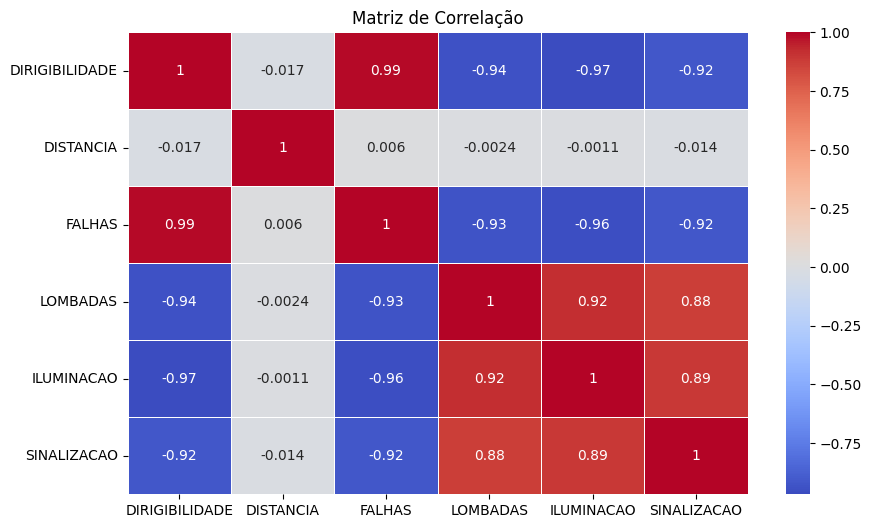

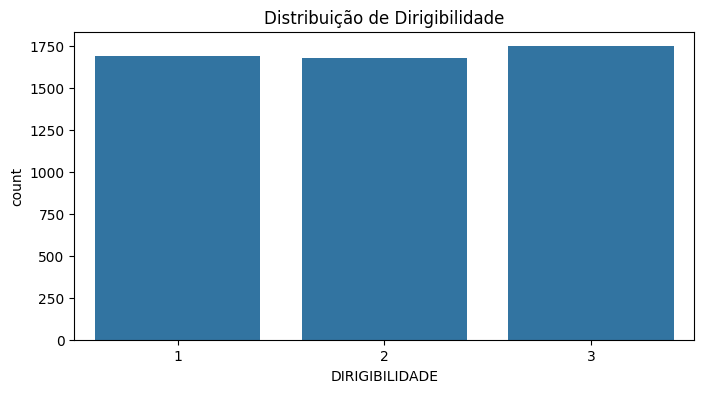

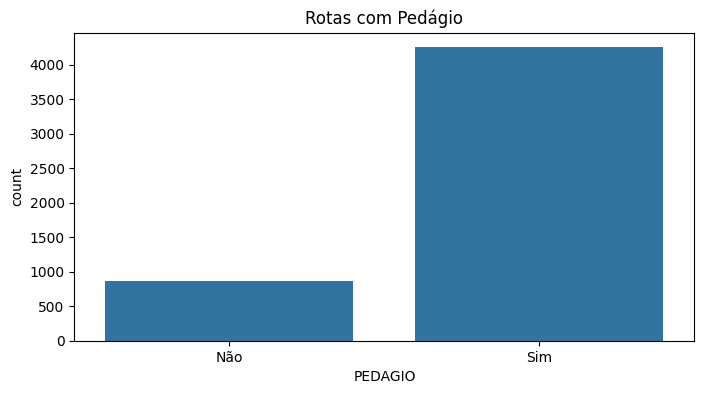

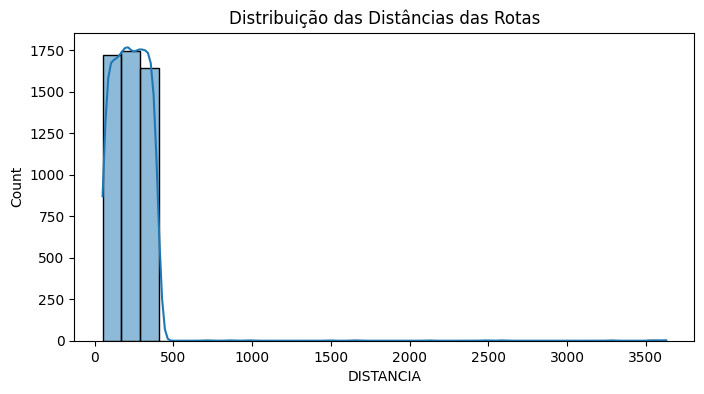

In [ ]:
#**💻💻Aluno: Rodrigo de Oliveira Rodrigues💻💻**
#**💻💻Disciplina: Machine Learning - Nível 1**💻💻**
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = ("https://drive.google.com/uc?id=16ES8pZ_FoAzvtm-o3p3g-V3M75kT-LOO")
df = pd.read_csv(file_path, sep=';')
df.head()



# Converter valores negativos em NaN para variáveis onde não faz sentido ter negativos
df['DISTANCIA'] = abs(df['DISTANCIA'])
df['FALHAS'] = df['FALHAS'].apply(lambda x: x if x >= 0 else None)
df['LOMBADAS'] = df['LOMBADAS'].apply(lambda x: x if x >= 0 else None)
df['ILUMINACAO'] = df['ILUMINACAO'].apply(lambda x: x if x >= 0 else None)
df['SINALIZACAO'] = df['SINALIZACAO'].apply(lambda x: x if x >= 0 else None)

# Tratar valores ausentes com a mediana (uma estratégia comum para dados numéricos)
df['FALHAS'].fillna(df['FALHAS'].median(), inplace=True)
df['LOMBADAS'].fillna(df['LOMBADAS'].median(), inplace=True)
df['ILUMINACAO'].fillna(df['ILUMINACAO'].median(), inplace=True)
df['SINALIZACAO'].fillna(df['SINALIZACAO'].median(), inplace=True)

# Estatísticas descritivas básicas
print("Estatísticas descritivas:")
print(df.describe(include='all'))

# Matriz de correlação para variáveis numéricas
#correlations = df.corr()
#print("\nCorrelação entre as variáveis:")
#print(correlations)


# Verificar os tipos de dados das colunas
print("\nTipos de dados das colunas:")
print(df.dtypes)

# Selecionar apenas colunas numéricas para a correlação
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Verificar as primeiras linhas das colunas numéricas
print("\nColunas numéricas:")
print(numerical_df.head())

# Matriz de correlação para variáveis numéricas
correlations = numerical_df.corr()
print("\nCorrelação entre as variáveis numéricas:")
print(correlations)

# Visualização de correlação usando um heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Distribuição de valores de 'DIRIGIBILIDADE'
plt.figure(figsize=(8, 4))
sns.countplot(x='DIRIGIBILIDADE', data=df)
plt.title('Distribuição de Dirigibilidade')
plt.show()

# Análise da presença de pedágios
plt.figure(figsize=(8, 4))
sns.countplot(x='PEDAGIO', data=df)
plt.title('Rotas com Pedágio')
plt.show()

# Visualização da distribuição de distâncias das rotas
plt.figure(figsize=(8, 4))
sns.histplot(df['DISTANCIA'], bins=30, kde=True)
plt.title('Distribuição das Distâncias das Rotas')
plt.show()


As possiveis correlações entre as variáveis e determinar quais poderiam ser bons candidatos a targets (como DIRIGIBILIDADE ou FALHAS).

In [ ]:
# Convert columns to appropriate data types and handle potential issues (e.g., negative distances)
df['DISTANCIA'] = abs(df['DISTANCIA'])  # Assuming negative distances are an error
df['PEDAGIO'] = df['PEDAGIO'].astype('category')
df['POSTOS'] = df['POSTOS'].astype('category')

# Basic descriptive statistics
stats_summary = df.describe(include='all')

# Checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

stats_summary, missing_values, data_types


(        DIRIGIBILIDADE ROTAS    DISTANCIA       FALHAS     LOMBADAS  \
 count      5119.000000  5119  5119.000000  5119.000000  5119.000000   
 unique             NaN  5119          NaN          NaN          NaN   
 top                NaN  R657          NaN          NaN          NaN   
 freq               NaN     1          NaN          NaN          NaN   
 mean          2.011330   NaN   229.984372    48.695644     5.122876   
 std           0.819762   NaN   141.974596    35.410974     2.802880   
 min           1.000000   NaN    50.000000     0.000000     1.000000   
 25%           1.000000   NaN   139.000000     7.000000     3.000000   
 50%           2.000000   NaN   226.000000    51.000000     5.000000   
 75%           3.000000   NaN   314.000000    85.000000     7.000000   
 max           3.000000   NaN  3630.000000   100.000000    10.000000   
 
          ILUMINACAO  SINALIZACAO PEDAGIO       POSTOS  
 count   5119.000000  5119.000000    5119         5114  
 unique          NaN